In [1]:
import IPython.core.display as di

from IPython.core.display import HTML
HTML("<style>.container { width:10% !important; }</style>")

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

In [12]:
%run workflow.py 'cs-training.csv'

/Users/dani/Desktop/CAPP-ML-dla/mlenv/lib/python2.7/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/dani/Desktop/CAPP-ML-dla/mlenv/lib/python2.7/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


0.931533333333


#  Dani Litovsky Alcala - ML ps2
-----------------------------------

## Goal:  predict who will experience financial distress in the next two years

In [4]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np 
import matplotlib.pyplot as plt
import pylab
import sys
import random
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [5]:
file_name = 'cs-training.csv'
df = pd.read_csv(file_name, header=0)

In [15]:
df['NumberOfDependents'].median()

0.0

In [12]:
pd.value_counts(df['MonthlyIncome'], sort=True, ascending=True)

SyntaxError: unexpected EOF while parsing (<ipython-input-12-273b1b594de2>, line 1)

Colomn names:

In [6]:
df.columns.values

array(['id', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
       'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'], dtype=object)

In [7]:
df.mean()

id                                      75000.500000
SeriousDlqin2yrs                            0.066840
RevolvingUtilizationOfUnsecuredLines        6.048438
age                                        52.295207
NumberOfTime30-59DaysPastDueNotWorse        0.421033
DebtRatio                                 353.005076
MonthlyIncome                            6670.221237
NumberOfOpenCreditLinesAndLoans             8.452760
NumberOfTimes90DaysLate                     0.265973
NumberRealEstateLoansOrLines                1.018240
NumberOfTime60-89DaysPastDueNotWorse        0.240387
NumberOfDependents                          0.757222
dtype: float64

In [8]:
df.mode().unstack()

id                                    0       NaN
SeriousDlqin2yrs                      0       0.0
RevolvingUtilizationOfUnsecuredLines  0       0.0
age                                   0      49.0
NumberOfTime30-59DaysPastDueNotWorse  0       0.0
DebtRatio                             0       0.0
MonthlyIncome                         0    5000.0
NumberOfOpenCreditLinesAndLoans       0       6.0
NumberOfTimes90DaysLate               0       0.0
NumberRealEstateLoansOrLines          0       0.0
NumberOfTime60-89DaysPastDueNotWorse  0       0.0
NumberOfDependents                    0       0.0
dtype: float64

In [9]:
df.corr().unstack()

id                                    id                                      1.000000
                                      SeriousDlqin2yrs                        0.002801
                                      RevolvingUtilizationOfUnsecuredLines    0.002372
                                      age                                     0.004403
                                      NumberOfTime30-59DaysPastDueNotWorse   -0.000571
                                      DebtRatio                              -0.002906
                                      MonthlyIncome                           0.002632
                                      NumberOfOpenCreditLinesAndLoans         0.004586
                                      NumberOfTimes90DaysLate                -0.001104
                                      NumberRealEstateLoansOrLines           -0.000666
                                      NumberOfTime60-89DaysPastDueNotWorse   -0.000777
                                      Numbe

Monthly income and Number of dependents have missing values, which we will impute. To deal with this issue, I investigated which best method would work best to impute. Generally, the mean would not work best in either of these situations as the mean would be sensitive to outliers.

In [11]:
df.isnull().sum()

id                                          0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

For Number of dependents, I recognized that most people did not have dependents, so I chose to impute the missing values with 0 dependents.

In [8]:
print_value_counts(df, 'MonthlyIncome')

NameError: name 'print_value_counts' is not defined

As for monthly income, I decided to impute the data with the median, which is less sensitive to the large monthly income outliers.

In [26]:
print 'monthly income median is: ', df['MonthlyIncome'].median()
print 'monthly income mean is: ', df['MonthlyIncome'].mean()

monthly income median is:  5400.0
monthly income mean is:  6670.22123739


#### To better understand the data, I created bins, or buckets, for income and age, which are graphed bellow. 

In [29]:
print 'age bins: '
print_value_counts(df, age_bucket)

age bins: 
(45, 50]     18829
(50, 55]     17861
(55, 60]     16945
(60, 65]     16461
(40, 45]     16208
(35, 40]     13611
(65, 70]     10963
(30, 35]     10728
(75, 120]    10129
(25, 30]      7730
(70, 75]      7507
(20, 25]      3027
(0, 20]          0
dtype: int64


In [30]:
print 'income bins: '
print_value_counts(df, income_bucket)

income bins: 
(9000, 3008750]    24320
(4000, 5000]       15461
(3000, 4000]       15314
(5000, 6000]       13215
(2000, 3000]       13081
(6000, 7000]       10720
(7000, 8000]        9024
(1000, 2000]        7208
(8000, 9000]        7131
(0, 1000]           3161
dtype: int64


#### Some histograms to visualize the data
These graphs plot a particular variable or variable bin to the mean of SeriousDlqin2yrs.

The graph shows that SeriousDlqin2yrs rises with more dependants, peaks around 7 dependants, and sharply drops after 9 dependants.

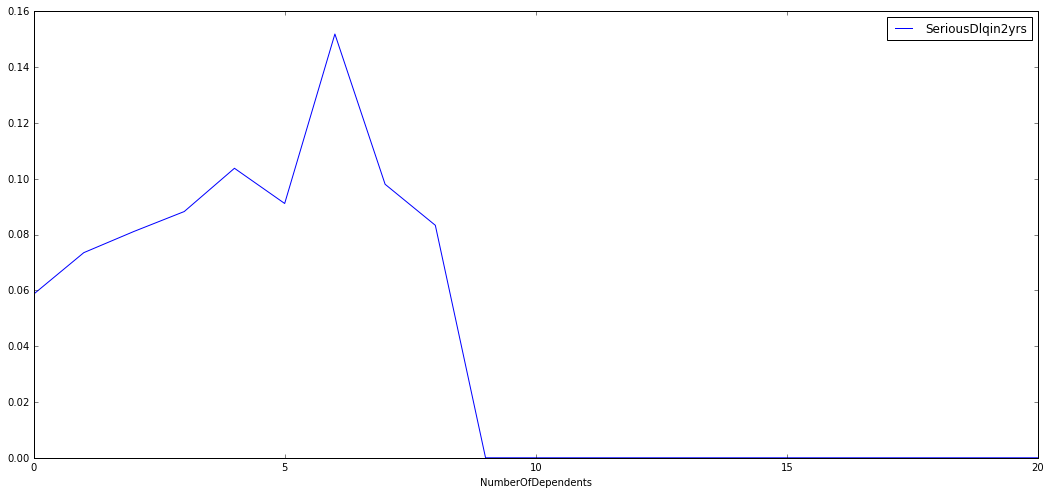

In [47]:
visualize_by_group_mean(df, ['NumberOfDependents', 'SeriousDlqin2yrs'], 'NumberOfDependents')


In [15]:
age_bins = [0] + range(20, 80, 5) + [120]
age_bucket = create_bins(df, 'age', age_bins)

This graph plots age bins to SeriousDlqin2yrs. It is very interesting that SeriousDlqin2yrs is highest among young people, and it drops off as people get older.

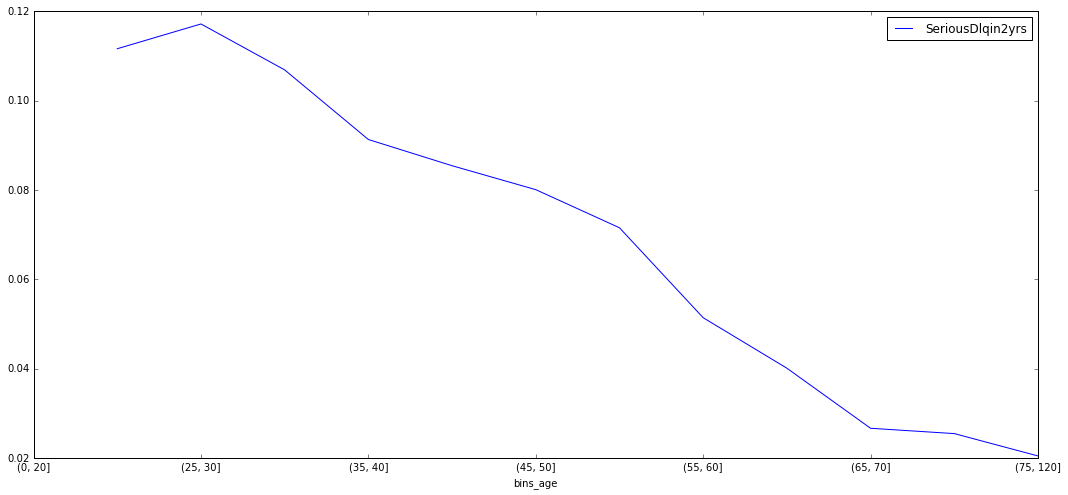

In [17]:
visualize_by_group_mean(df, [age_bucket, "SeriousDlqin2yrs"], age_bucket)


In [19]:
income_bins = range(0, 10000, 1000) + [df['MonthlyIncome'].max()]
income_bucket = create_bins(df, 'MonthlyIncome', income_bins)

Monthly income buckets show that those who are more likely to have serious issues with debt are those with monthly incomes between 1000 and 2000. 

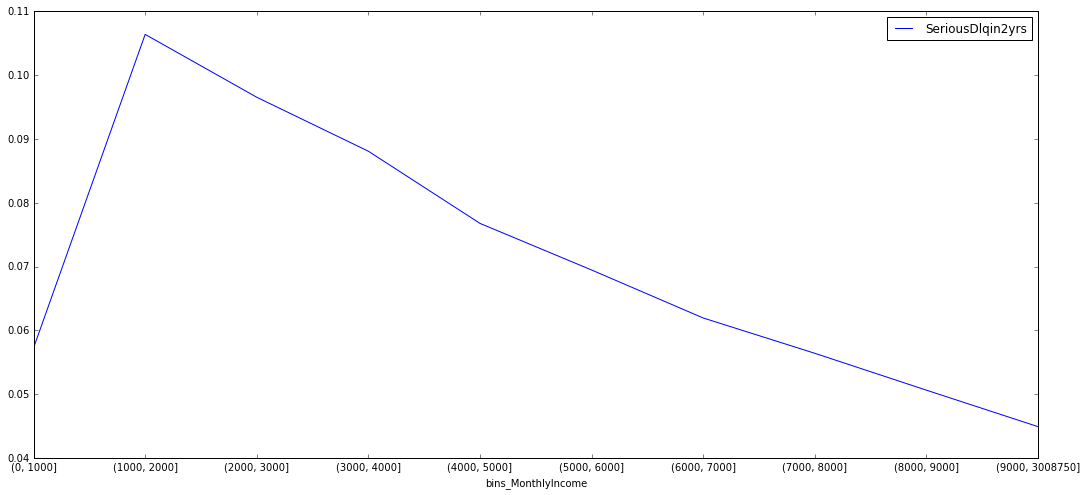

In [20]:
visualize_by_group_mean(df, [income_bucket, "SeriousDlqin2yrs"], income_bucket)

### Creating and Evaluating a model

I chose to work with a logistic regression model to predict who could experience 90 days past due delinquency or worse  

I tested my model's accuracy and looked for variables that improved accuracy. Instead of testing a model with various features one at a time, I chose to use a method called recursive feature selection, which will find the best features to predict data by recursively considering smaller and smaller sets of features.

#### CONCLUSION:

With features .... I was able to predict ...